## One Hot

In [26]:
corpus=[["this movie had a brilliant story line with great action"],
["some parts were not so great but overall pretty ok"],
["my dog went to sleep watching this piece of trash"]]

def get_tokenized_corpus(corpus):
    return [sentence[0].split(" ") for sentence in corpus]

tokenized_corpus = get_tokenized_corpus(corpus)
print(tokenized_corpus)

[['this', 'movie', 'had', 'a', 'brilliant', 'story', 'line', 'with', 'great', 'action'], ['some', 'parts', 'were', 'not', 'so', 'great', 'but', 'overall', 'pretty', 'ok'], ['my', 'dog', 'went', 'to', 'sleep', 'watching', 'this', 'piece', 'of', 'trash']]


In [27]:
with open('google-10000-english.txt', 'r') as f:
    raw_text = f.readlines()

In [28]:
vocab = [word.strip() for word in raw_text]
print("First five entries of vocabulary:", vocab[0:5])

First five entries of vocabulary: ['the', 'of', 'and', 'to', 'a']


Our corpus has **3** Sentences and each sentence has **10** tokens and each token is a part of vocab of size **10000**. So the shape of onehot corpus is going to be (3,10,10000)  

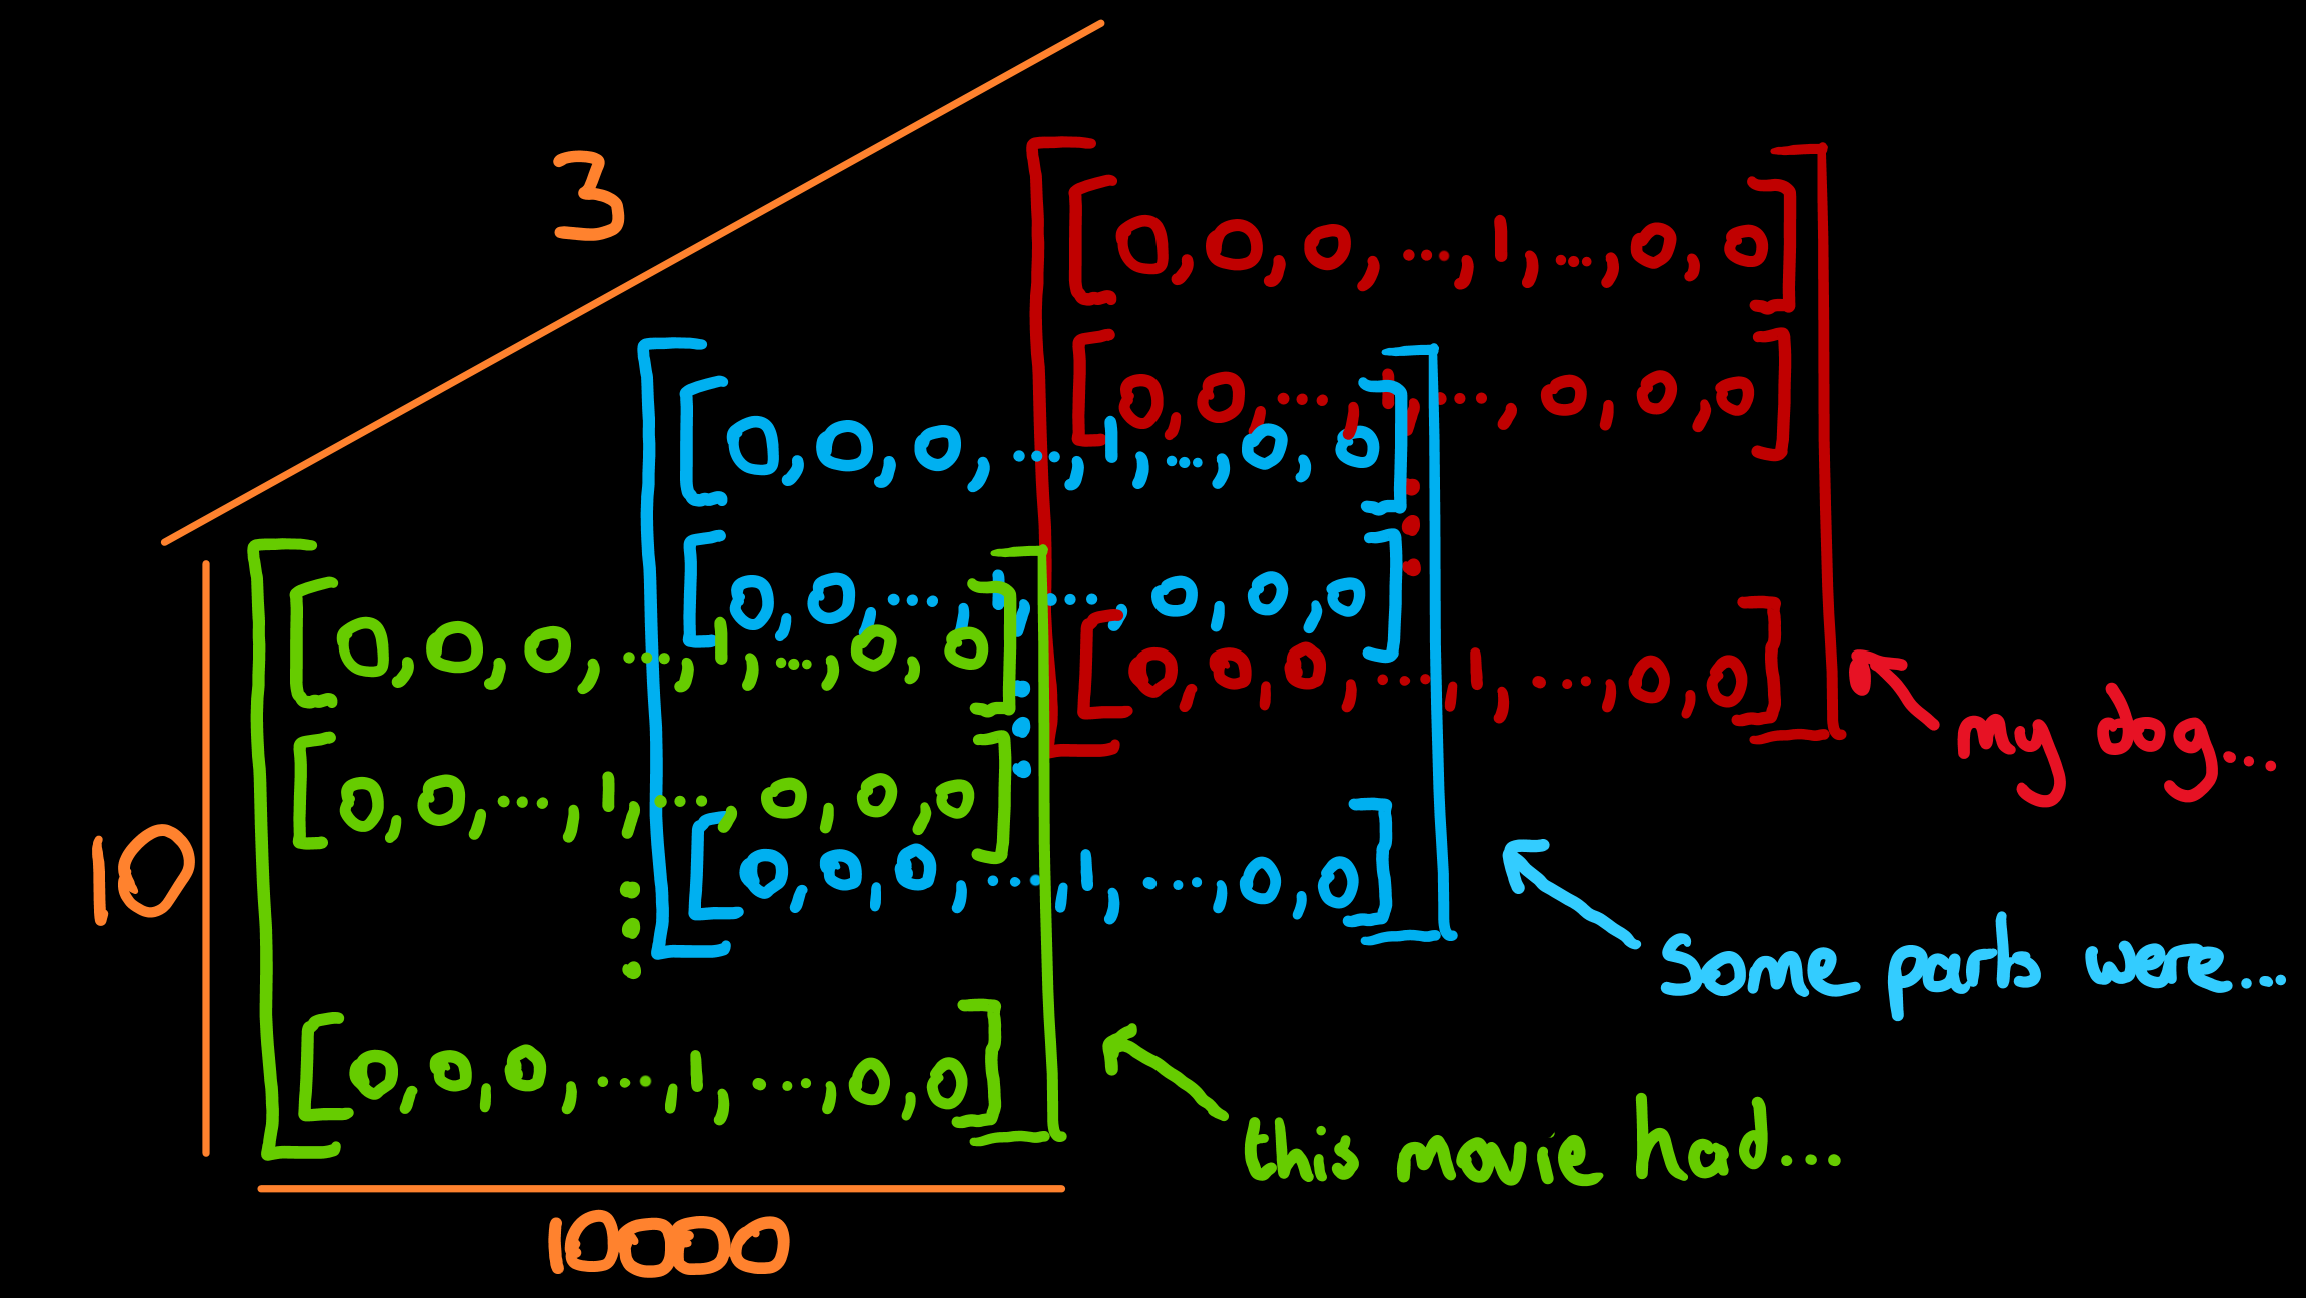

In [29]:
import numpy as np
def get_onehot_corpus(corpus, tokenized_corpus, vocab):

    CORPUS_SIZE = len(corpus)
    MAX_LEN_SEQUENCE = max(len(x) for x in tokenized_corpus)
    VOCAB_LEN = len(vocab)

    onehot_corpus = np.zeros((CORPUS_SIZE, MAX_LEN_SEQUENCE, VOCAB_LEN))
    for corpus_idx, tokenized_sentence in enumerate(tokenized_corpus):
        for sequence_idx, token in enumerate(tokenized_sentence):
            token_vocab_idx = vocab.index(token)
            onehot_corpus[corpus_idx, sequence_idx, token_vocab_idx] = 1
            
    return onehot_corpus

onehot_corpus = get_onehot_corpus(corpus, tokenized_corpus, vocab)
print(onehot_corpus.shape)

(3, 10, 10000)


In [30]:
new_reviews = [["good movie"], ["this movie had a significant amount of flaws"]]
corpus.extend(new_reviews)

tokenized_corpus = get_tokenized_corpus(corpus)
onehot_corpus = get_onehot_corpus(corpus, tokenized_corpus, vocab)

ValueError: 'flaws' is not in list

In [31]:
import plotly.graph_objects as go

animal_labels = ["Lion", "Elephant", "Hyena", "Mouse", "Pig", "Horse", "Dolphin", "Wasp", "Giraffe", "Dog", "Alligator", "Mole", "Scarlett Johansson"]
animal_cuteness = [80, 75, 10, 60, 30, 50, 90, 1, 60, 95, 8, 30, 100]
animal_size = [50, 95, 30, 8, 30, 65, 45, 1, 80, 20, 40, 12, 30]



fig = go.Figure(data=[go.Scatter(
    x=animal_cuteness, y=animal_size,
    text=animal_labels,
    mode='markers+text',
    marker_size=70)
])

fig.update_layout(
    title="Animal Cuteness vs Animal Size",
    xaxis_title="Animal Cuteness",
    yaxis_title="Animal Size",
)

fig.show()

In [32]:
import math
def distance_2d(x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

In [33]:
def get_animal_info(animal_name):
    if animal_name in animal_labels:
        animal_idx = animal_labels.index(animal_name)
        animal_cuteness_ = animal_cuteness[animal_idx]
        animal_size_ = animal_size[animal_idx]
        return animal_cuteness_, animal_size_
    else:
        return False

In [34]:
alligator_cuteness, alligator_size = get_animal_info("Alligator")
hyena_cuteness, hyena_size = get_animal_info("Hyena")
elephant_cuteness, elephant_size = get_animal_info("Elephant")

print("DISTANCE BETWEEN ALLIGATOR AND HYENA", distance_2d(alligator_cuteness, alligator_size, hyena_cuteness, hyena_size))
print("DISTANCE BETWEEN ALLIGATOR AND ELEPHANT", distance_2d(alligator_cuteness, alligator_size, elephant_cuteness, elephant_size))

DISTANCE BETWEEN ALLIGATOR AND HYENA 10.198039027185569
DISTANCE BETWEEN ALLIGATOR AND ELEPHANT 86.68333173107735


In [35]:
horse_cuteness, horse_size = get_animal_info("Horse")
pig_cuteness, pig_size = get_animal_info("Pig")

fig.add_trace(go.Scatter(x=[pig_cuteness, horse_cuteness], y=[pig_size, horse_size]))
fig.update_layout(showlegend=False)
fig.show()

In [36]:
# let's get the x and y difference between Pig and Horse
pig_horse_diff_cuteness = abs(pig_cuteness - horse_cuteness)
pig_horse_diff_size = abs(pig_size - horse_size)

# now let's apply the analogy to Mouse:
  # Pig is to Horse as Mouse is to ???
mouse_cuteness, mouse_size = get_animal_info("Mouse")
fig.add_trace(go.Scatter(x=[mouse_cuteness, mouse_cuteness + pig_horse_diff_cuteness], y=[mouse_size, mouse_size + pig_horse_diff_size]))
fig.update_layout(showlegend=False)
fig.show()


In [37]:
# just to remind us ;)
animal_labels = animal_labels
animal_cuteness = animal_cuteness
animal_size = animal_size
animal_ferocity = [85, 20, 90, 1, 10, 30, 20, 100, 65, 15, 90, 15, 69]


# nothing particularly important... just used for visualisation purposes
import statistics
animal_mean_stats = [statistics.mean(k) for k in zip(animal_cuteness, animal_size, animal_ferocity)]

In [38]:
fig = go.Figure(data=[go.Scatter3d(
    x=animal_cuteness, y=animal_size, z=animal_ferocity,
    text=animal_labels,
    mode='markers+text',
    marker=dict(
        size=12,
        color=animal_mean_stats,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ))
])

fig.update_layout(title="Animal Cuteness vs Animal Size vs Animal Ferocity",
    scene = dict(
    xaxis_title='Animal Cuteness',
    yaxis_title='Animal Size',
    zaxis_title='Animal Ferocity')
)


fig.show()

In [39]:
# Let's redefine this function to return ferocity as well
def get_animal_info(animal_name):
    if animal_name in animal_labels:
        animal_idx = animal_labels.index(animal_name)
        animal_cuteness_ = animal_cuteness[animal_idx]
        animal_size_ = animal_size[animal_idx]
        animal_ferocity_ = animal_ferocity[animal_idx]
        return animal_cuteness_, animal_size_, animal_ferocity_
    else:
        return False

In [40]:
# Euclidean distance
def distance(coord1, coord2):
    return math.sqrt(sum([(i - j)**2 for i, j in zip(coord1, coord2)]))

In [41]:
hyena_coords = get_animal_info("Hyena")
alligator_coords = get_animal_info("Alligator")
print("Distance between Hyena and Alligator:", distance(hyena_coords, alligator_coords))

dog_coords = get_animal_info("Dog")
print("Distance between Hyena and Dog:", distance(hyena_coords, dog_coords))

Distance between Hyena and Alligator: 10.198039027185569
Distance between Hyena and Dog: 113.79806676741042


In [42]:
# Closest
animal_info = zip(animal_labels, animal_cuteness, animal_size, animal_ferocity)

def closest_to(animal_name, n=3):
    primary_animal_stats = get_animal_info(animal_name)
    distances_from_animal = []
    for label, cuteness, size, ferocity in animal_info:
        
        if label==animal_name:
            continue
            
        secondary_animal_stat = (cuteness, size, ferocity)
        distances_from_animal.append((label, distance(primary_animal_stats, secondary_animal_stat)))
        
    sorted_distances_from_animal = sorted(distances_from_animal, key=lambda x: x[1])
    
    return sorted_distances_from_animal[:n]
    
closest_to("Horse")

[('Giraffe', 39.370039370059054),
 ('Elephant', 40.311288741492746),
 ('Pig', 45.0)]

In [43]:
import numpy as np
glove_file = open("glove_50d_truncated.txt", "r", encoding="utf8")
glove_vectors_list = [word_and_vector.strip() for word_and_vector in glove_file.readlines()]
glove_vectors = {obj.split()[0]: np.asarray(obj.split()[1:], dtype=float) for obj in glove_vectors_list}
print(glove_vectors["the"])

[ 4.1800e-01  2.4968e-01 -4.1242e-01  1.2170e-01  3.4527e-01 -4.4457e-02
 -4.9688e-01 -1.7862e-01 -6.6023e-04 -6.5660e-01  2.7843e-01 -1.4767e-01
 -5.5677e-01  1.4658e-01 -9.5095e-03  1.1658e-02  1.0204e-01 -1.2792e-01
 -8.4430e-01 -1.2181e-01 -1.6801e-02 -3.3279e-01 -1.5520e-01 -2.3131e-01
 -1.9181e-01 -1.8823e+00 -7.6746e-01  9.9051e-02 -4.2125e-01 -1.9526e-01
  4.0071e+00 -1.8594e-01 -5.2287e-01 -3.1681e-01  5.9213e-04  7.4449e-03
  1.7778e-01 -1.5897e-01  1.2041e-02 -5.4223e-02 -2.9871e-01 -1.5749e-01
 -3.4758e-01 -4.5637e-02 -4.4251e-01  1.8785e-01  2.7849e-03 -1.8411e-01
 -1.1514e-01 -7.8581e-01]


In [44]:
king_vector = glove_vectors["king"]
queen_vector = glove_vectors["queen"]
man_vector = glove_vectors["man"]
woman_vector = glove_vectors["woman"]
water_vector = glove_vectors["water"]
earth_vector = glove_vectors["earth"]

In [45]:
from plotly.subplots import make_subplots

# Let's visualise these vectors and colour them based on their elemental values
# Red is lower, white=0, blue is higher

# vectors is a list of tuples: [(vector_name, vector)]
def plot_vectors(vectors):
    
    fig = make_subplots(rows=len(vectors), cols=1)
    
    for i, vector_tuple in enumerate(vectors):
        vector_name = vector_tuple[0]
        vector = vector_tuple[1]

        normalized_vector = (vector-np.min(vector))/(np.ptp(vector))
        x = ["dimension_"+str(_) for _ in range(50)]
        y = [1] * 50
        
        fig.add_trace(
            go.Bar(x=x, y=y, marker=dict(
            color=normalized_vector,                # set color to an array/list of desired values
            colorscale='rdbu',   # choose a colorscale
            opacity=0.8,
        )),
            row=i+1, col=1
        )
        
        fig.update_yaxes(title_text=vector_name, row=i+1, col=1)
        
    
    fig.update_layout(height=175*len(vectors), xaxis_showgrid=False, yaxis_showgrid=False, showlegend=False)
    fig.update_yaxes(showticklabels=False)
    fig.update_xaxes(showticklabels=False)
    fig.show()

plot_vectors([("King", king_vector), ("Queen", queen_vector), ("Man", man_vector), ("Woman", woman_vector), ("Water", water_vector), ("Earth", earth_vector)])

In [46]:
# Use the cosine distance instead of the euclidean distance we coded up earlier on
from scipy.spatial.distance import cosine

def find_closest(to_find_closest, exclude_list):
    closest_distance = float("inf")
    closest_token = None

    for token, vector in glove_vectors.items():
        distance = cosine(to_find_closest, vector)
        if closest_distance > distance and token not in exclude_list:
            closest_distance = distance
            closest_token = token

    return closest_token

In [47]:
to_find_closest = king_vector - man_vector + woman_vector
print(find_closest(to_find_closest, ["king", "man", "woman"]))

queen


In [48]:
london_england = glove_vectors["england"] - glove_vectors["london"]
to_find_closest = london_england + glove_vectors["paris"]
print(find_closest(to_find_closest, ["london", "england", "paris"]))

france


In [49]:
print(find_closest(glove_vectors["france"] + glove_vectors["capital"], ["france", "capital"]))

paris


In [50]:
# our corpus is now more in a format you would find a corpus in production
corpus = [corpus[idx][0] for idx, sentence in enumerate(corpus)]

more_movie_reviews = [
    "this was a BRILLIANT 👍 movie",
    "💩 film",
    "this was a terrible movie",
    "this was a treribel movie",
    "this was a good 👍 movie",
    "A moving story about U.S. wildlife.",
    "Wow. I had not expected wildlife in the US to be so diverse",
    "Wow - what a MOVIE 👍",
    "Us here at The Movie Reviewers found this movie exceedingly average",
    "The Polish people in this film... stunning 👍",
    "A bit of a polish to this movie would have made it great",
    "This film didn't exite me as much as much as the prequel.",
    "this movie doesn't live up to the hype of its trailer",
    "It's rare that a film is this good??",
    "This movie was 👍 💩"
]

corpus.extend(more_movie_reviews)
corpus

['this movie had a brilliant story line with great action',
 'some parts were not so great but overall pretty ok',
 'my dog went to sleep watching this piece of trash',
 'good movie',
 'this movie had a significant amount of flaws',
 'this was a BRILLIANT 👍 movie',
 '💩 film',
 'this was a terrible movie',
 'this was a treribel movie',
 'this was a good 👍 movie',
 'A moving story about U.S. wildlife.',
 'Wow. I had not expected wildlife in the US to be so diverse',
 'Wow - what a MOVIE 👍',
 'Us here at The Movie Reviewers found this movie exceedingly average',
 'The Polish people in this film... stunning 👍',
 'A bit of a polish to this movie would have made it great',
 "This film didn't exite me as much as much as the prequel.",
 "this movie doesn't live up to the hype of its trailer",
 "It's rare that a film is this good??",
 'This movie was 👍 💩']

In [51]:
def tokenize(corpus):
    return [review.split() for review in corpus]
        
tokenized_corpus = tokenize(corpus)
print(tokenized_corpus)

[['this', 'movie', 'had', 'a', 'brilliant', 'story', 'line', 'with', 'great', 'action'], ['some', 'parts', 'were', 'not', 'so', 'great', 'but', 'overall', 'pretty', 'ok'], ['my', 'dog', 'went', 'to', 'sleep', 'watching', 'this', 'piece', 'of', 'trash'], ['good', 'movie'], ['this', 'movie', 'had', 'a', 'significant', 'amount', 'of', 'flaws'], ['this', 'was', 'a', 'BRILLIANT', '👍', 'movie'], ['💩', 'film'], ['this', 'was', 'a', 'terrible', 'movie'], ['this', 'was', 'a', 'treribel', 'movie'], ['this', 'was', 'a', 'good', '👍', 'movie'], ['A', 'moving', 'story', 'about', 'U.S.', 'wildlife.'], ['Wow.', 'I', 'had', 'not', 'expected', 'wildlife', 'in', 'the', 'US', 'to', 'be', 'so', 'diverse'], ['Wow', '-', 'what', 'a', 'MOVIE', '👍'], ['Us', 'here', 'at', 'The', 'Movie', 'Reviewers', 'found', 'this', 'movie', 'exceedingly', 'average'], ['The', 'Polish', 'people', 'in', 'this', 'film...', 'stunning', '👍'], ['A', 'bit', 'of', 'a', 'polish', 'to', 'this', 'movie', 'would', 'have', 'made', 'it', 'g

In [52]:
distinct_tokens_count = {}
for t_review in tokenized_corpus:
    for token in t_review:
        if token not in distinct_tokens_count.keys():
            distinct_tokens_count[token] = 1
        else:
            distinct_tokens_count[token] += 1
            
for token, count in distinct_tokens_count.items():
    print("{:<14s} {:<10d}".format(token, count))

this           12        
movie          11        
had            3         
a              9         
brilliant      1         
story          2         
line           1         
with           1         
great          3         
action         1         
some           1         
parts          1         
were           1         
not            2         
so             2         
but            1         
overall        1         
pretty         1         
ok             1         
my             1         
dog            1         
went           1         
to             4         
sleep          1         
watching       1         
piece          1         
of             4         
trash          1         
good           2         
significant    1         
amount         1         
flaws          1         
was            5         
BRILLIANT      1         
👍              5         
💩              2         
film           3         
terrible       1         
treribel    

In [53]:
for token, count in distinct_tokens_count.items():
    if "movie" in token.lower():
        print(token, count)

for token, count in distinct_tokens_count.items():
    if "film" in token.lower():
        print(token, count)        

for token, count in distinct_tokens_count.items():
    if "good" in token.lower():
        print(token, count)

for token, count in distinct_tokens_count.items():
    if "polish" in token.lower():
        print(token, count)

for token, count in distinct_tokens_count.items():
    if "wildlife" in token.lower():
        print(token, count)

for token, count in distinct_tokens_count.items():
    if "us" in token.lower() or "u.s." in token.lower():
        print(token, count)

movie 11
MOVIE 1
Movie 1
film 3
film... 1
good 2
good?? 1
Polish 1
polish 1
wildlife. 1
wildlife 1
U.S. 1
US 1
Us 1


In [54]:
import re # regex

# The backslash is an escape character to let the interpreter know we mean to use it as a string literal (- or ') 
re_punctuation_string = '[\s,/.?\-\']'  # split on spaces (\s),  commas (,), slash (/), fullstop (.), question marks (?), hyphens (-), and apostrophe (').
tokenized_corpus = []
for review in corpus:
    tokenized_review = re.split(re_punctuation_string, review) # in python's regex, [...] is an alternative to writing .|.|.
    tokenized_review = list(filter(None, tokenized_review)) # remove empty strings from list 
    tokenized_corpus.append([token.lower() for token in tokenized_review]) # Lowercasing everything
        
print(tokenized_corpus)

[['this', 'movie', 'had', 'a', 'brilliant', 'story', 'line', 'with', 'great', 'action'], ['some', 'parts', 'were', 'not', 'so', 'great', 'but', 'overall', 'pretty', 'ok'], ['my', 'dog', 'went', 'to', 'sleep', 'watching', 'this', 'piece', 'of', 'trash'], ['good', 'movie'], ['this', 'movie', 'had', 'a', 'significant', 'amount', 'of', 'flaws'], ['this', 'was', 'a', 'brilliant', '👍', 'movie'], ['💩', 'film'], ['this', 'was', 'a', 'terrible', 'movie'], ['this', 'was', 'a', 'treribel', 'movie'], ['this', 'was', 'a', 'good', '👍', 'movie'], ['a', 'moving', 'story', 'about', 'u', 's', 'wildlife'], ['wow', 'i', 'had', 'not', 'expected', 'wildlife', 'in', 'the', 'us', 'to', 'be', 'so', 'diverse'], ['wow', 'what', 'a', 'movie', '👍'], ['us', 'here', 'at', 'the', 'movie', 'reviewers', 'found', 'this', 'movie', 'exceedingly', 'average'], ['the', 'polish', 'people', 'in', 'this', 'film', 'stunning', '👍'], ['a', 'bit', 'of', 'a', 'polish', 'to', 'this', 'movie', 'would', 'have', 'made', 'it', 'great'], 

<>:4: SyntaxWarning:

invalid escape sequence '\s'

<>:4: SyntaxWarning:

invalid escape sequence '\s'

/var/folders/qd/nnwwkgqd7m11zrq6syq4q8c80000gn/T/ipykernel_85781/2513158313.py:4: SyntaxWarning:

invalid escape sequence '\s'



In [55]:
distinct_tokens_count = {}
for t_review in tokenized_corpus:
    for token in t_review:
        if token not in distinct_tokens_count.keys():
            distinct_tokens_count[token] = 1
        else:
            distinct_tokens_count[token] += 1

In [56]:
for token, count in distinct_tokens_count.items():
    if "movie" in token.lower():
        print(token, count)

for token, count in distinct_tokens_count.items():
    if "film" in token.lower():
        print(token, count)        

for token, count in distinct_tokens_count.items():
    if "good" in token.lower():
        print(token, count)

for token, count in distinct_tokens_count.items():
    if "polish" in token.lower():
        print(token, count)

for token, count in distinct_tokens_count.items():
    if "wildlife" in token.lower():
        print(token, count)

for token, count in distinct_tokens_count.items():
    if "us" in token.lower() or "u.s." in token.lower():
        print(token, count)

movie 13
film 4
good 3
polish 2
wildlife 2
us 2


In [57]:
print("U+", ord("😂"))

U+ 128514


In [58]:

vocabulary = set()
for review in tokenized_corpus:
    vocabulary.update(review)

print("LENGTH OF VOCAB:", len(vocabulary), "\nVOCAB:", vocabulary)

LENGTH OF VOCAB: 82 
VOCAB: {'this', 'of', 'doesn', 'dog', 'hype', 'ok', 'sleep', 'wow', '👍', 'treribel', 'to', 'rare', 'that', 'moving', 'about', 'here', '💩', 'be', 'line', 'trailer', 'parts', 'so', 'didn', 'movie', 'u', 'significant', 'story', 'diverse', 'with', 'had', 'much', 'would', 'amount', 'brilliant', 'made', 'found', 'average', 'not', 'exceedingly', 'have', 'action', 'the', 'reviewers', 'but', 'me', 'it', 'people', 'live', 't', 'went', 'us', 'bit', 'a', 'exite', 'expected', 'is', 'trash', 'flaws', 'overall', 'my', 'good', 'its', 'pretty', 'wildlife', 'what', 'was', 'stunning', 'polish', 'in', 'i', 'terrible', 'some', 'great', 'watching', 'were', 'film', 's', 'prequel', 'as', 'up', 'at', 'piece'}


In [59]:
# Let's map these to the aforementioned dictionaries
word2idx = {}
n_words = 0

for token in vocabulary:
    if token not in word2idx:
        word2idx[token] = n_words
        n_words += 1
        
assert len(word2idx) == len(vocabulary)

In [60]:
print(word2idx)

{'this': 0, 'of': 1, 'doesn': 2, 'dog': 3, 'hype': 4, 'ok': 5, 'sleep': 6, 'wow': 7, '👍': 8, 'treribel': 9, 'to': 10, 'rare': 11, 'that': 12, 'moving': 13, 'about': 14, 'here': 15, '💩': 16, 'be': 17, 'line': 18, 'trailer': 19, 'parts': 20, 'so': 21, 'didn': 22, 'movie': 23, 'u': 24, 'significant': 25, 'story': 26, 'diverse': 27, 'with': 28, 'had': 29, 'much': 30, 'would': 31, 'amount': 32, 'brilliant': 33, 'made': 34, 'found': 35, 'average': 36, 'not': 37, 'exceedingly': 38, 'have': 39, 'action': 40, 'the': 41, 'reviewers': 42, 'but': 43, 'me': 44, 'it': 45, 'people': 46, 'live': 47, 't': 48, 'went': 49, 'us': 50, 'bit': 51, 'a': 52, 'exite': 53, 'expected': 54, 'is': 55, 'trash': 56, 'flaws': 57, 'overall': 58, 'my': 59, 'good': 60, 'its': 61, 'pretty': 62, 'wildlife': 63, 'what': 64, 'was': 65, 'stunning': 66, 'polish': 67, 'in': 68, 'i': 69, 'terrible': 70, 'some': 71, 'great': 72, 'watching': 73, 'were': 74, 'film': 75, 's': 76, 'prequel': 77, 'as': 78, 'up': 79, 'at': 80, 'piece':

In [61]:
def get_focus_context_pairs(tokenized_corpus, window_size=2):
    focus_context_pairs = []
    for sentence in tokenized_corpus:

        for token_idx, token in enumerate(sentence):
            for w in range(-window_size, window_size+1):
                context_word_pos = token_idx + w

                if w == 0 or context_word_pos >= len(sentence) or context_word_pos < 0:
                    continue

                try:
                    focus_context_pairs.append([token, sentence[context_word_pos]])
                except:
                    continue
    
    return focus_context_pairs
                
focus_context_pairs = get_focus_context_pairs(tokenized_corpus)
print(focus_context_pairs)

[['this', 'movie'], ['this', 'had'], ['movie', 'this'], ['movie', 'had'], ['movie', 'a'], ['had', 'this'], ['had', 'movie'], ['had', 'a'], ['had', 'brilliant'], ['a', 'movie'], ['a', 'had'], ['a', 'brilliant'], ['a', 'story'], ['brilliant', 'had'], ['brilliant', 'a'], ['brilliant', 'story'], ['brilliant', 'line'], ['story', 'a'], ['story', 'brilliant'], ['story', 'line'], ['story', 'with'], ['line', 'brilliant'], ['line', 'story'], ['line', 'with'], ['line', 'great'], ['with', 'story'], ['with', 'line'], ['with', 'great'], ['with', 'action'], ['great', 'line'], ['great', 'with'], ['great', 'action'], ['action', 'with'], ['action', 'great'], ['some', 'parts'], ['some', 'were'], ['parts', 'some'], ['parts', 'were'], ['parts', 'not'], ['were', 'some'], ['were', 'parts'], ['were', 'not'], ['were', 'so'], ['not', 'parts'], ['not', 'were'], ['not', 'so'], ['not', 'great'], ['so', 'were'], ['so', 'not'], ['so', 'great'], ['so', 'but'], ['great', 'not'], ['great', 'so'], ['great', 'but'], ['gr

In [62]:
# Let's map these to our indicies in preparation to one-hot
def get_focus_context_idx(focus_context_pairs):
    idx_pairs = []
    for pair in focus_context_pairs:
        idx_pairs.append([word2idx[pair[0]], word2idx[pair[1]]])
    
    return idx_pairs

idx_pairs = get_focus_context_idx(focus_context_pairs)
print(idx_pairs)

[[0, 23], [0, 29], [23, 0], [23, 29], [23, 52], [29, 0], [29, 23], [29, 52], [29, 33], [52, 23], [52, 29], [52, 33], [52, 26], [33, 29], [33, 52], [33, 26], [33, 18], [26, 52], [26, 33], [26, 18], [26, 28], [18, 33], [18, 26], [18, 28], [18, 72], [28, 26], [28, 18], [28, 72], [28, 40], [72, 18], [72, 28], [72, 40], [40, 28], [40, 72], [71, 20], [71, 74], [20, 71], [20, 74], [20, 37], [74, 71], [74, 20], [74, 37], [74, 21], [37, 20], [37, 74], [37, 21], [37, 72], [21, 74], [21, 37], [21, 72], [21, 43], [72, 37], [72, 21], [72, 43], [72, 58], [43, 21], [43, 72], [43, 58], [43, 62], [58, 72], [58, 43], [58, 62], [58, 5], [62, 43], [62, 58], [62, 5], [5, 58], [5, 62], [59, 3], [59, 49], [3, 59], [3, 49], [3, 10], [49, 59], [49, 3], [49, 10], [49, 6], [10, 3], [10, 49], [10, 6], [10, 73], [6, 49], [6, 10], [6, 73], [6, 0], [73, 10], [73, 6], [73, 0], [73, 81], [0, 6], [0, 73], [0, 81], [0, 1], [81, 73], [81, 0], [81, 1], [81, 56], [1, 0], [1, 81], [1, 56], [56, 81], [56, 1], [60, 23], [23, 

In [63]:
def get_one_hot(indicies, vocab_size=len(vocabulary)):
    oh_matrix = np.zeros((len(indicies), vocab_size))
    for i, idx in enumerate(indicies):
        oh_matrix[i, idx] = 1

    return torch.Tensor(oh_matrix)

In [64]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm
import random

writer = SummaryWriter('runs/word2vec')

In [65]:
class Word2Vec(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim_size):
        super().__init__()
        
        # Why do you think we don't have an activation function here?
        self.projection = nn.Linear(input_size, hidden_dim_size, bias=False)
        self.output = nn.Linear(hidden_dim_size, output_size)
        
    def forward(self, input_token):
        x = self.projection(input_token)
        output = self.output(x)
        return output

In [66]:
# Tensorboard doesn't handle encoding emojis.
# So while we can train our model on emojis (as we've just done)
# We gotta convert their unicode string to something displayable on Tensorboard

word2idx[":pile_of_poo:"] = word2idx.pop("\U0001f4a9")
word2idx[":thumbs_up:"] = word2idx.pop("\U0001f44d")
word2idx = {k: v for k, v in sorted(word2idx.items(), key=lambda item: item[1])} # sort dictionary

In [67]:
def train(word2vec_model, idx_pairs, state_dict_filename, early_stop=False, num_epochs=10, lr=1e-3):

    word2vec_model.train()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(word2vec_model.parameters(), lr=lr)

    for epoch in tqdm(range(num_epochs)):

        random.shuffle(idx_pairs)

        for focus, context in idx_pairs:
            print(focus)
            oh_inputs = get_one_hot([focus], len(vocabulary))
            target = torch.LongTensor([context])

            pred_outputs = word2vec_model(oh_inputs)

            loss = criterion(pred_outputs, target)

            loss.backward()
            optimizer.step()
            word2vec_model.zero_grad()
            
        ### These lines stop training early
            if early_stop: break
        if early_stop: break
        ###

        torch.save(word2vec_model.state_dict(), state_dict_filename)
        writer.add_embedding(word2vec_model.projection.weight.T,
                             metadata=word2idx.keys(), global_step=epoch)

In [68]:
word2vec = Word2Vec(len(vocabulary), len(vocabulary), 10)
train(word2vec, idx_pairs, "word2vec.pt")

 10%|█         | 1/10 [00:00<00:00,  9.08it/s]

30
0
41
35
72
23
8
64
61
50
10
8
51
11
52
33
0
0
51
41
0
0
80
0
52
81
47
52
21
52
54
0
49
10
20
41
23
52
16
29
52
76
6
68
34
60
56
52
60
52
25
69
21
10
54
14
4
67
23
23
3
52
23
25
48
41
23
23
71
29
52
68
47
10
28
62
63
68
49
16
68
23
16
17
65
44
73
52
4
32
72
75
70
78
60
8
65
48
0
72
37
42
23
33
44
37
13
0
0
75
74
77
13
9
65
24
24
73
23
23
0
30
29
52
26
5
39
70
26
28
17
1
45
63
52
26
23
42
6
49
50
0
30
7
52
40
27
69
10
78
23
45
79
1
59
37
52
6
62
18
23
78
65
0
33
11
8
12
41
40
21
14
76
75
32
48
52
58
14
60
73
52
34
65
78
80
4
0
32
75
36
31
21
21
20
65
5
36
52
23
52
35
33
52
17
52
67
10
68
61
26
41
66
65
0
65
81
31
58
0
18
65
13
65
28
0
75
43
21
78
50
48
23
38
72
58
1
75
1
8
52
41
33
1
2
43
78
0
37
55
75
23
41
25
8
48
1
44
76
58
0
63
74
30
63
10
37
39
76
0
37
46
14
12
42
45
65
32
9
79
30
68
49
74
15
33
8
46
52
23
53
60
52
55
0
52
46
76
11
0
52
29
0
10
41
1
50
23
80
81
1
48
68
79
78
70
10
23
78
6
10
1
53
74
72
76
29
22
2
19
0
75
23
52
33
2
26
55
29
48
8
0
73
18
23
52
8
46
0
45
20
65
41
4

 50%|█████     | 5/10 [00:00<00:00, 14.88it/s]

65
78
33
52
68
32
52
63
41
8
8
55
30
46
64
23
21
23
6
23
64
80
26
0
18
29
47
23
0
23
4
10
23
23
52
52
23
0
63
41
73
39
72
1
41
41
65
28
0
67
73
75
41
77
10
52
1
29
4
18
72
34
31
60
54
9
65
12
65
0
29
67
34
6
51
44
44
50
30
41
80
21
53
8
24
60
44
14
50
68
23
41
52
43
1
43
36
76
20
23
72
74
23
65
39
40
1
0
0
47
29
32
64
26
3
15
0
29
20
0
41
10
77
52
8
0
75
45
75
63
41
26
31
0
78
68
3
1
54
76
69
8
26
0
52
52
7
41
37
56
0
52
41
81
44
4
8
68
58
71
0
8
23
72
79
72
54
0
22
10
45
23
52
47
66
10
25
0
33
72
36
13
75
63
0
26
65
48
51
78
45
22
23
33
78
18
38
1
32
78
14
52
25
17
24
52
10
29
26
69
74
52
66
0
23
8
46
0
11
19
53
66
44
78
35
9
42
10
51
52
37
30
41
10
11
36
4
0
41
29
40
24
43
41
21
68
52
30
7
72
40
75
41
75
23
79
8
47
67
3
33
52
0
59
79
50
19
18
30
78
27
10
68
30
80
43
0
1
15
6
67
65
75
13
0
79
72
0
32
51
23
65
0
33
8
11
16
42
41
23
8
33
28
33
33
63
73
81
23
5
0
48
34
28
55
78
81
32
73
39
52
18
67
64
73
58
22
75
45
78
49
23
41
44
74
23
58
18
81
52
26
0
65
52
54
26
23
41
17
0
1
52
72
78


 70%|███████   | 7/10 [00:00<00:00, 15.64it/s]

79
75
81
41
52
54
29
23
23
23
0
72
50
72
52
52
23
0
34
73
10
52
41
52
23
23
29
52
23
43
75
2
79
74
33
48
18
42
52
63
0
58
52
41
41
10
8
52
79
14
14
7
60
0
76
51
22
81
52
23
23
32
65
48
11
0
10
7
31
0
29
56
52
60
68
52
14
21
57
48
65
41
70
14
0
74
56
27
10
1
52
1
52
5
65
0
52
76
46
43
75
23
41
42
65
78
49
54
0
0
41
22
72
48
26
20
52
23
1
33
23
18
1
50
18
30
81
23
50
52
39
38
38
75
1
24
12
29
51
68
23
8
79
59
76
65
69
76
68
37
2
79
41
54
1
29
23
55
64
8
68
1
25
31
6
1
9
42
23
21
67
48
4
37
23
26
23
41
23
23
50
33
34
52
78
26
68
8
0
0
6
13
37
75
72
21
10
67
0
49
14
16
52
48
62
70
59
15
44
0
44
17
20
73
65
28
31
48
54
1
25
7
52
10
3
81
67
24
63
41
70
8
23
3
2
75
8
60
52
74
34
28
52
49
75
30
19
22
23
0
12
26
64
33
46
63
79
45
33
44
0
8
25
1
29
23
37
28
6
30
72
42
23
60
10
75
46
53
17
15
0
52
72
35
53
53
13
78
65
17
73
29
42
65
81
40
13
47
45
43
4
73
75
9
52
41
52
50
45
41
66
31
65
72
58
55
43
21
0
30
23
53
44
27
0
0
41
10
79
46
22
34
52
0
22
60
61
58
7
65
52
0
52
76
63
21
63
78
51
80
26
8
3

100%|██████████| 10/10 [00:00<00:00, 14.82it/s]

51
60
52
38
12
3
60
75
35
28
52
38
80
63
35
52
0
14
4
15
0
32
10
0
42
0
64
41
65
42
78
23
0
42
8
45
81
50
75
67
55
36
52
4
57
0
34
24
52
41
30
52
31
78
75
26
23
72
9
31
22
44
76
41
21
35
10
21
78
1
1
54
52
48
14
33
76
54
75
75
0
44
4
41
78
25
29
0
77
31
68
78
18
52
8
13
33
23
7
1
44
54
81
21
52
41
64
53
48
37
66
33
6
66
58
59
0
25
49
72
0
52
46
52
52
23
20
23
75
50
70
4
0
0
8
10
63
21
52
41
44
8
37
47
75
23
52
0
67
34
18
72
78
2
31
15
80
33
10
29
10
21
23
71
8
44
5
22
48
39
75
78
68
23
63
0
78
11
52
48
19
52
12
23
63
52
41
8
50
6
16
79
24
52
65
60
9
0
78
41
23
0
75
54
51
1
23
12
76
23
36
0
10
10
60
29
65
65
23
60
17
1
59
4
38
37
46
67
43
30
21
22
68
81
19
80
0
1
60
62
46
23
72
24
45
0
65
34
72
10
41
69
30
35
43
71
47
52
56
23
55
52
8
52
27
29
29
48
48
74
52
7
78
78
29
0
57
67
52
22
0
69
8
52
75
38
80
10
72
76
6
76
68
63
1
58
65
61
64
2
60
33
65
0
30
20
1
23
10
0
30
79
41
62
74
63
41
12
28
23
81
0
1
41
26
41
79
23
45
6
81
4
50
25
57
41
1
41
23
17
50
11
42
40
52
52
33
65
75
29
55
15
0
10

## Spacy